<a href="https://colab.research.google.com/github/alexrafkin/ideal-parakeet/blob/main/FeatureEngineeeringI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

sp = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()

In [ ]:
sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

Text(0.5, 1.0, 'histogram of writing scores')

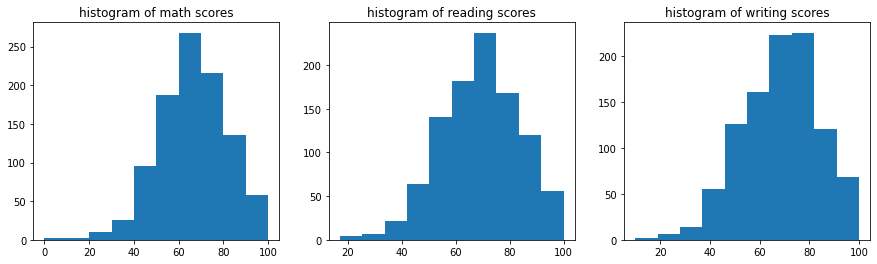

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
plt.hist(sp["math score"])
plt.title("histogram of math scores")

plt.subplot(1, 3, 2)
plt.hist(sp["reading score"])
plt.title("histogram of reading scores")

plt.subplot(1, 3, 3)
plt.hist(sp["writing score"])
plt.title("histogram of writing scores")

They seem close to normally distributed, but we need to test.

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_math = jarque_bera(sp['math score'])
norm_math = normaltest(sp['math score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_math[0], jb_math[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_math[0], norm_math[1]))

jb_reading = jarque_bera(sp['reading score'])
norm_reading = normaltest(sp['reading score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_reading[0], jb_reading[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_reading[0], norm_reading[1]))

jb_writing = jarque_bera(sp['writing score'])
norm_writing = normaltest(sp['writing score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_writing[0], jb_writing[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_writing[0], norm_writing[1]))


Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


None are normally distributed.

In order to perform boxcox, need to change the one math score value of 0 to 1.

In [ ]:
sp['math score'][59] = 1

In [ ]:
sp['math score'].sort_values()

59       1
980      8
17      18
787     19
145     22
      ... 
626    100
624    100
451    100
962    100
149    100
Name: math score, Length: 1000, dtype: int64

In [ ]:
from scipy.stats import boxcox

math_boxcox,_ = boxcox(sp['math score'])
reading_boxcox,_ = boxcox(sp['reading score'])
writing_boxcox,_ = boxcox(sp['writing score'])

Text(0.5, 1.0, 'histogram of boxcox writing scores')

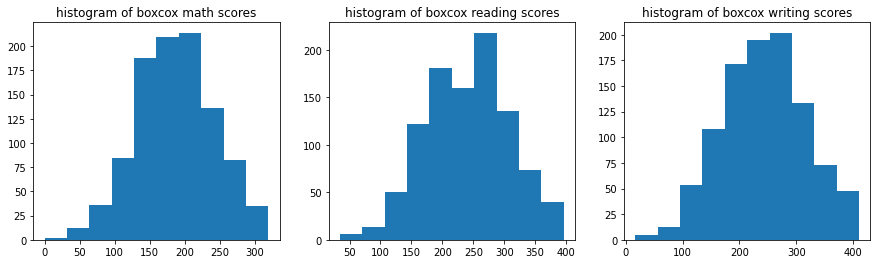

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of boxcox math scores")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of boxcox reading scores")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of boxcox writing scores")

These seem more normally distributed.

In [ ]:
jb_bc_math = jarque_bera(math_boxcox)
norm_bc_math = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_bc_math[0], jb_bc_math[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_bc_math[0], norm_bc_math[1]))

jb_bc_reading = jarque_bera(reading_boxcox)
norm_bc_reading = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_bc_reading[0], jb_bc_reading[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_bc_reading[0], norm_bc_reading[1]))

jb_bc_writing = jarque_bera(writing_boxcox)
norm_bc_writing = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_bc_writing[0], jb_bc_writing[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_bc_writing[0], norm_bc_writing[1]))


Jarque-Bera test statistics is 0.9589872977598923 and p value is 0.6190967928084308
Normality test statistics is 0.9034195001197268 and p value is 0.6365388982921865
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


All are normally distributed.

2. Say you want to use a single variable for the exam scores as your target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [ ]:
sp['average score'] = (sp['math score'] + sp['reading score'] + sp['writing score'])/3

Text(0.5, 1.0, 'histogram of average scores')

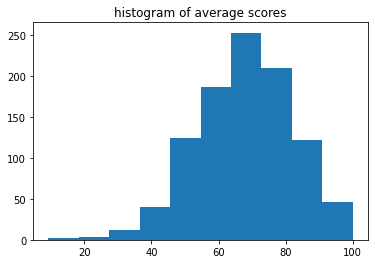

In [ ]:
plt.hist(sp["average score"])
plt.title("histogram of average scores")

In [ ]:
jb_avg = jarque_bera(sp['average score'])
norm_avg = normaltest(sp['average score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_avg[0], jb_avg[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_avg[0], norm_avg[1]))

Jarque-Bera test statistics is 15.299648399479786 and p value is 0.0004761278250606793
Normality test statistics is 15.039484104419722 and p value is 0.0005422724257804356


Not normally distributed.

In [ ]:
avg_boxcox,_ = boxcox(sp['average score'])

Text(0.5, 1.0, 'histogram of boxcox average scores')

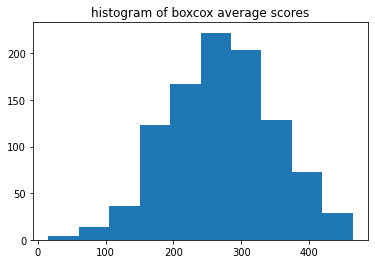

In [ ]:
plt.hist(avg_boxcox)
plt.title("histogram of boxcox average scores")

Looks better

In [ ]:
jb_bc_avg = jarque_bera(avg_boxcox)
norm_bc_avg = normaltest(avg_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_bc_avg[0], jb_bc_avg[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_bc_avg[0], norm_bc_avg[1]))

Jarque-Bera test statistics is 2.4521731518328407 and p value is 0.29343868363041326
Normality test statistics is 2.802994172232588 and p value is 0.2462280632575158


Now it's normal.

3. Which variables seem related to the target variable (the newly created variable from the previous question)? If your goal is to explain the determinants of success in exams, which variables in your dataset might be useful?

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
sp2 = sp.copy()

In [ ]:
sp2 = pd.concat([sp2, pd.get_dummies(sp2["gender"]), pd.get_dummies(sp2["race/ethnicity"]), pd.get_dummies(sp2["parental level of education"]), pd.get_dummies(sp2["lunch"]), pd.get_dummies(sp2["test preparation course"])], axis=1)

In [ ]:
sp2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,male,group C,some college,standard,none,76,78,75,76.333333,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
sp2.corr()

,math score,reading score,writing score,average score,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
math score,1.000000,0.817577,0.802619,0.918724,-0.167967,0.167967,-0.092024,-0.084306,-0.073311,0.050046,0.205887,0.063211,0.079662,-0.128795,0.060418,0.037031,-0.079733,-0.350888,0.350888,0.177704,-0.177704
reading score,0.817577,1.000000,0.954598,0.970340,0.244313,-0.244313,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780
writing score,0.802619,0.954598,1.000000,0.965671,0.301225,-0.301225,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946
average score,0.918724,0.970340,0.965671,1.000000,0.130896,-0.130896,-0.104821,-0.078265,-0.030659,0.058893,0.141054,0.067408,0.106601,-0.161963,0.102415,0.026751,-0.087205,-0.290060,0.290060,0.256717,-0.256717
female,-0.167967,0.244313,0.301225,0.130896,1.000000,-1.000000,-0.071001,0.028466,0.063368,-0.030566,-0.020302,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028
male,0.167967,-0.244313,-0.301225,-0.130896,-1.000000,1.000000,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028
group A,-0.092024,-0.096274,-0.110714,-0.104821,-0.071001,0.071001,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315
group B,-0.084306,-0.060283,-0.078254,-0.078265,0.028466,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106
group C,-0.073311,-0.003074,-0.010203,-0.030659,0.063368,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522
group D,0.050046,0.035177,0.082032,0.058893,-0.030566,0.030566,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956


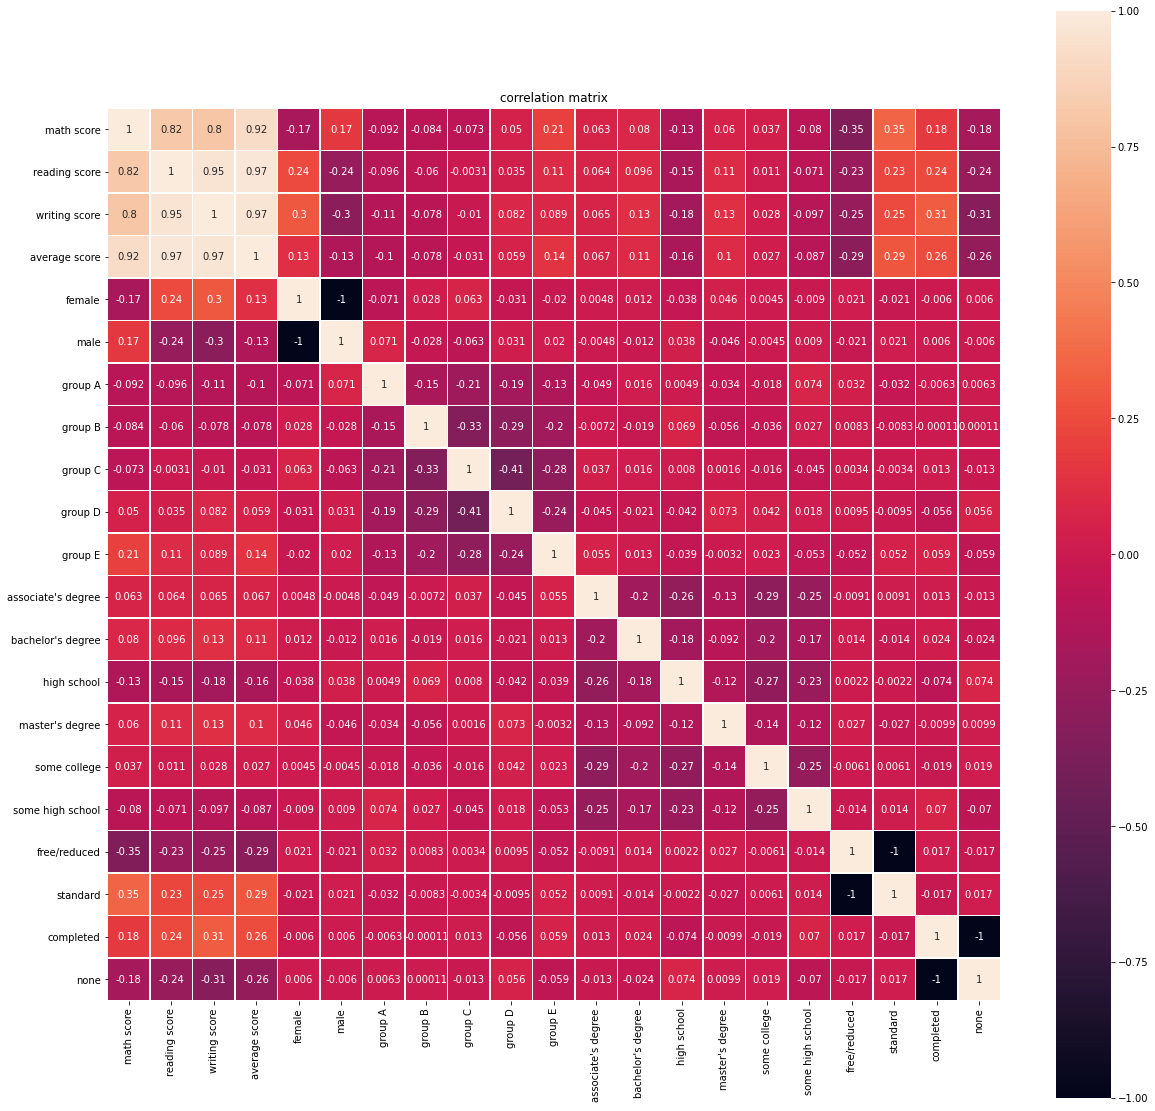

In [ ]:
corrmat_sp2 = sp2.corr()
plt.figure(figsize=(20,20))

# Draw the heat map using seaborn
sns.heatmap(corrmat_sp2, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")

plt.show()

Looking at the fourth row (or fourth column), we can see which variables are correlated with average score success. We can see that test prep course completion, having standard lunch, having parents w a masters or bachelors degree, being in group E, being female are the strongest categorical variables correlated with higher average success. 